In [24]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
sys.path.append('../../../iiasa/ceds_harmonization_analysis/')

In [26]:
import utils

In [27]:
df = pd.read_csv('results.csv')

In [31]:
utils.plot_lines?

In [33]:
df.loc[df.scenario.str.contains('override'), 'model'] = 'foo'

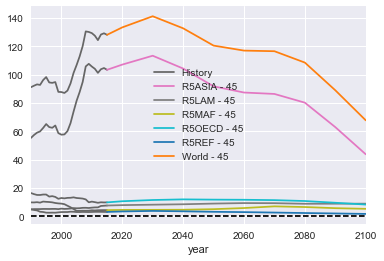

In [34]:
utils.plot_lines(df, gas='CO', sector='Industrial Sector')

In [35]:
df.head()

,region,model,scenario,ind,year,value,ssp,kind
0,AFR,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|BC|Agricultural Was...,2015,0.056201,SSP2,45
1,AFR,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|BC|Energy Sector|Ha...,2015,0.033676,SSP2,45
2,AFR,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|BC|Forest Burning|H...,2015,0.056316,SSP2,45
3,AFR,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|BC|Grassland Burnin...,2015,0.701252,SSP2,45
4,AFR,MESSAGE-GLOBIOM,SSP2-45-SPA2-V25-no,CEDS+|9+ Sectors|Emissions|BC|Harmonized-DB,2015,2.047021,SSP2,45


In [21]:
x = pd.read_csv('results.csv')

In [23]:
x.tail()

,region,model,scenario,ind,year,value,ssp,kind
296329,World,History,CEDS,CEDS+|9+ Sectors|Emissions|VOC|Waste|Unharmonized,2011,7.081729,CEDS,History
296330,World,History,CEDS,CEDS+|9+ Sectors|Emissions|VOC|Waste|Unharmonized,2012,7.153125,CEDS,History
296331,World,History,CEDS,CEDS+|9+ Sectors|Emissions|VOC|Waste|Unharmonized,2013,7.226148,CEDS,History
296332,World,History,CEDS,CEDS+|9+ Sectors|Emissions|VOC|Waste|Unharmonized,2014,7.297804,CEDS,History
296333,World,History,CEDS,CEDS+|9+ Sectors|Emissions|VOC|Waste|Unharmonized,2015,7.316984,CEDS,History
